<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklearn_Classifier_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Import Modules


In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

# Load Data

In [3]:
data_obj = load_breast_cancer()

In [8]:
print(data_obj.DESCR)

# 569 rows of recrods
# 30 features

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
data_obj.data.shape

(569, 30)

In [9]:
data_obj.target.shape

(569,)

# Pre-Processing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_obj.data, data_obj.target, 
                                                    stratify=data_obj.target,       # equally extract amount of records from each type of target
                                                    random_state=1)

# Train Model

## Default hyperparam

In [17]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
print(f'Score - train set : {model.score(X_train, y_train)}')
print(f'Score - test set  : {model.score(X_test, y_test)}')

# prone to overfitting 

Score - train set : 1.0
Score - test set  : 0.9370629370629371


## Split by entropy method

In [18]:
model = DecisionTreeClassifier(random_state=0, criterion='entropy')
model.fit(X_train, y_train)
print(f'Score - train set : {model.score(X_train, y_train)}')
print(f'Score - test set  : {model.score(X_test, y_test)}')

# also prone to over-fitting

Score - train set : 1.0
Score - test set  : 0.9440559440559441


## Limit tree depth to max. 4

In [26]:
model = DecisionTreeClassifier(random_state=0, max_depth=4 )
model.fit(X_train, y_train)
print(f'Score - train set : {model.score(X_train, y_train)}')
print(f'Score - test set  : {model.score(X_test, y_test)}')

# Attempt to reduce overfitting by limiting tree depth. Test set prediction doesn't seem to have positive impact

Score - train set : 0.9812206572769953
Score - test set  : 0.9370629370629371


## Limit tree nodes to 6

In [28]:
model = DecisionTreeClassifier(random_state=0, max_leaf_nodes=6 )
model.fit(X_train, y_train)
print(f'Score - train set : {model.score(X_train, y_train)}')
print(f'Score - test set  : {model.score(X_test, y_test)}')

# Attempt to reduce overfitting by limiting tree node. Test set prediction doesn't seem to have positive impact

Score - train set : 0.9694835680751174
Score - test set  : 0.9440559440559441


# Plot Result

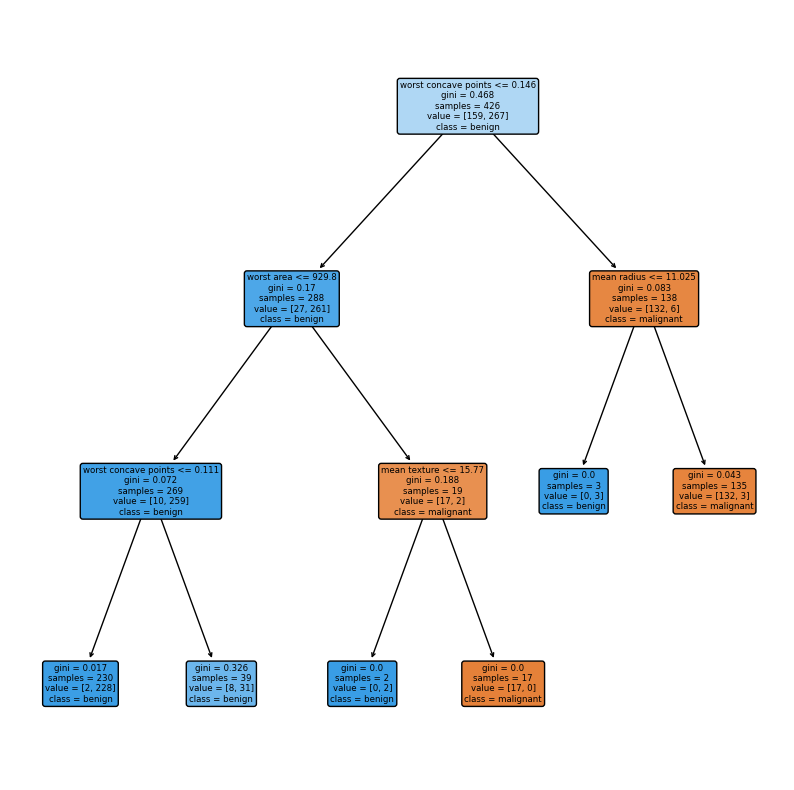

In [30]:
plt.style.use('default')
plt.figure(figsize=(10,10))
plot_tree(model, 
          feature_names=data_obj.feature_names, 
          class_names=data_obj.target_names, 
          filled=True, rounded=True)

# plt.savefig('BreastCancer_DecisionTree.png')
plt.show()

# nodes = 6
# depth = 4

# Feature Analysis

In [35]:
ft_importance = list(zip(data_obj.feature_names, model.feature_importances_))
ft_importance.sort(key = lambda x : x[1], reverse=True)
ft_importance

[('worst concave points', 0.8003361430201655),
 ('worst area', 0.14766940009050816),
 ('mean radius', 0.03174696404981372),
 ('mean texture', 0.020247492839512556),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0),
 ('mean symmetry', 0.0),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.0),
 ('texture error', 0.0),
 ('perimeter error', 0.0),
 ('area error', 0.0),
 ('smoothness error', 0.0),
 ('compactness error', 0.0),
 ('concavity error', 0.0),
 ('concave points error', 0.0),
 ('symmetry error', 0.0),
 ('fractal dimension error', 0.0),
 ('worst radius', 0.0),
 ('worst texture', 0.0),
 ('worst perimeter', 0.0),
 ('worst smoothness', 0.0),
 ('worst compactness', 0.0),
 ('worst concavity', 0.0),
 ('worst symmetry', 0.0),
 ('worst fractal dimension', 0.0)]

## Plot result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


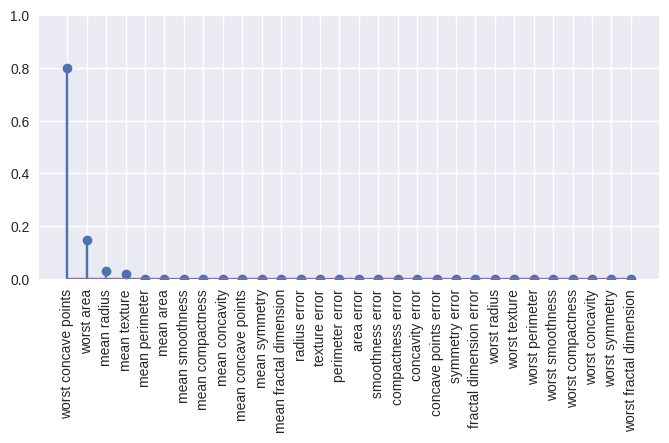

In [54]:
plt.style.use('seaborn')
plt.stem([x[1] for x in ft_importance])
plt.xticks(range(len(ft_importance)), [x[0] for x in ft_importance], rotation=90)
plt.ylim([0,1])
plt.gcf().subplots_adjust(bottom=0.4)
plt.show()